# Data analysis and pre-processing 

#### Author: Francesca Naretto
#### Dataset: Adult dataset https://archive.ics.uci.edu/ml/datasets/adult

### Load the dataset

In [23]:
import pandas as pd
dataset = pd.read_csv('adult.data', header=None, sep=r'\s*,\s*')
dataset.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country', 'class' ]

### Description of the dataset?
##### With .head() we print the first 5 records of our dataframe. We can see their features' values.
##### With .info() we have a general description of the dataset: the columns names, how many values are not null and the type of the features. Note that for the type you can also use .dtypes.
##### With .describe() we have a statistical description of the dataset: the mean, std, min, max quartiles.

In [23]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   martial-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capitalgain     32561 non-null  int64 
 11  capitalloss     32561 non-null  int64 
 12  hoursperweek    32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
martial-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

In [26]:
dataset.describe()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
dataset['class'].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: int64

### Missing values?
#### Hint: we know arleady something from .info()
#### Use .isnull() + sum, any

In [28]:
dataset.isnull()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
dataset.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
martial-status    False
occupation        False
relationship      False
race              False
sex               False
capitalgain       False
capitalloss       False
hoursperweek      False
native-country    False
class             False
dtype: bool

In [30]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
martial-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
class             0
dtype: int64

### Is there any correlation among the features?
#### The function .corr() gives the correlation. There are many formulas to find the correlation. This method allows for pearson, kendall, spearman. 
#### Is it available for any kind of features?

In [24]:
dataset['age'].corr(dataset['hoursperweek'])

0.06875570750955737

In [32]:
dataset.corr()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capitalgain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capitalloss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hoursperweek,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


### We can analyze the data distribution by visualizing different things.
##### Scatter plot: to visualize how data are distributed depending on 2 or 3 features. Usually, we can select different colours depending on the class label.
##### Histogram: given a feature (or more than one) visualize the distribution of the data exploiting bins or categorical variables.
##### Box plot
##### Density plot


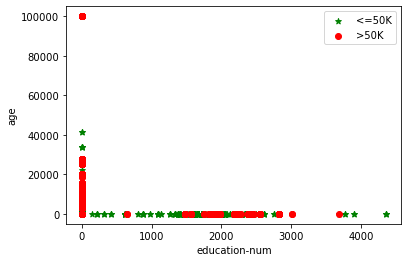

In [36]:
import matplotlib.pyplot as plt
plt.scatter(dataset[dataset['class'].str.contains('<=50K')]['capitalloss'], 
            dataset[dataset['class'].str.contains('<=50K')]['capitalgain'], color='g', marker='*', label='<=50K')
plt.scatter(dataset[dataset['class'].str.contains('>50K')]['capitalloss'], 
            dataset[dataset['class'].str.contains('>50K')]['capitalgain'], color='r',label='>50K')
plt.xlabel('education-num')
plt.ylabel('age')
plt.legend()
plt.show()

In [37]:
print(dataset['class'].str)

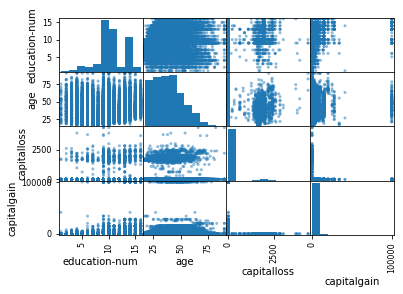

In [38]:
pd.plotting.scatter_matrix(dataset[['education-num', 'age', 'capitalloss', 'capitalgain']])
plt.show()

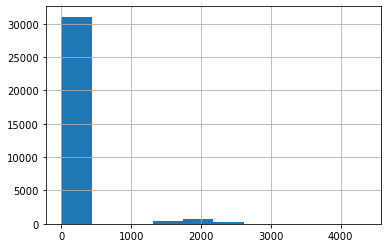

In [39]:
dataset['capitalloss'].hist(bins=10)
plt.show()

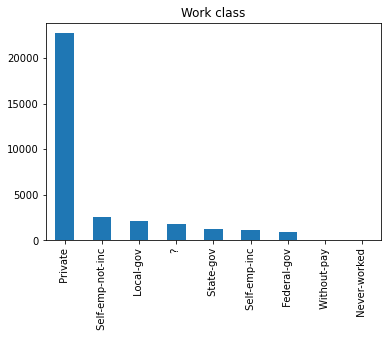

In [74]:
dataset['workclass'].value_counts().plot(kind='bar', 
                                   title='Work class')
plt.show()

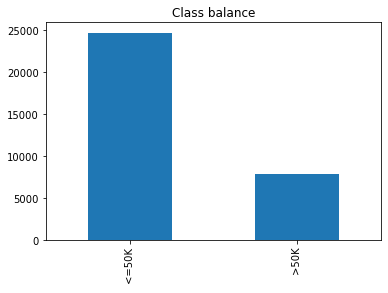

In [63]:
dataset['class'].value_counts().plot(kind='bar', 
                                   title='Class balance')
plt.show()

<AxesSubplot:title={'center':'Age distribution'}, ylabel='Density'>

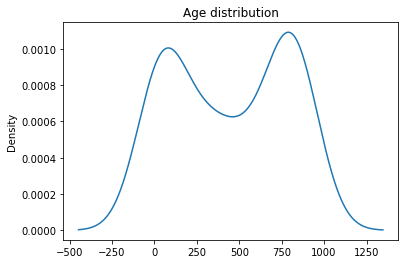

In [169]:
dataset['age'].value_counts().plot(kind='kde', 
                                   title='Age distribution')

In [67]:
# Pclass
pclass_xt = pd.crosstab(dataset['education-num'], dataset['class'])
pclass_xt

class,<=50K,>50K
education-num,,
1,51,0
2,162,6
3,317,16
4,606,40
5,487,27
6,871,62
7,1115,60
8,400,33
9,8826,1675


In [68]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

class,<=50K,>50K
education-num,,
1,1.000000,0.000000
2,0.964286,0.035714
3,0.951952,0.048048
4,0.938080,0.061920
5,0.947471,0.052529
6,0.933548,0.066452
7,0.948936,0.051064
8,0.923788,0.076212
9,0.840491,0.159509


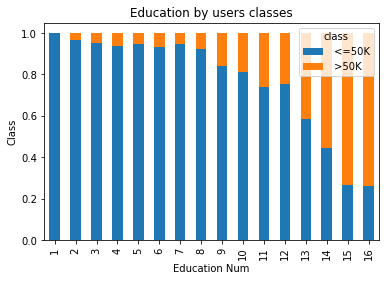

In [71]:
pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='Education by users classes')
plt.xlabel('Education Num')
plt.ylabel('Class')
plt.show()

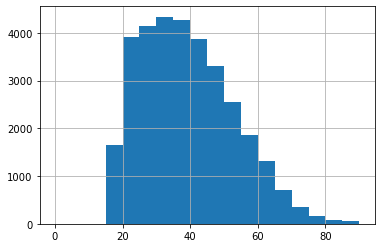

In [166]:
dataset['age'].hist(bins=np.arange(0, 95, 5))
plt.show()

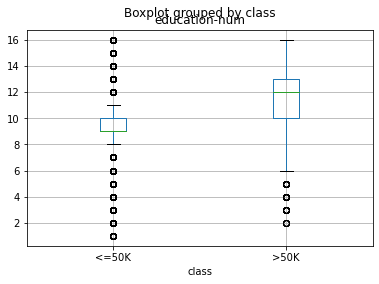

In [173]:
boxplot = dataset.boxplot(column=['education-num'], by='class')

### Here we do not have missing values. What is the other thing to check?

In [163]:
dataset['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

#### Pay attention to the values of workclass. There is a ?. That is actually a missing value. We can leave it like that, or?
#### A solution may be to replace the missing value we the mean of the colum
#### Another solution may be to replace the missing value with the mode.

In [17]:
values = dataset['workclass'].value_counts()

In [164]:
dataset['workclass'].replace(
    to_replace=['?'],
    value=values.keys()[0],
    inplace=True
)


In [165]:
dataset['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
dataset['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)